In [1]:
import re, sys, os
import numpy as np
sys.path.append("./bin")
import matplotlib.pyplot as plt
from functools import partial
import pandas as pd
from matplotlib import colors
import twoconf_x_P_higherac

In [2]:
instance=twoconf_x_P_higherac.GRFCalculations_100_100_15()
othervars=np.array([0])

In [3]:
#Cycle conditions- do not execute this cell
#closed conf
ax_0_0*aP_x_0*bx_xP_0*bP_P_0=aP_0_0*ax_P_0*bP_xP_0*bx_x_0
#if cooperativity affects unbinding only
ax_0_0*aP_0_0*bx_x_0/w1*bP_P_0=aP_0_0*ax_0_0*bP_P_0/w1*bx_x_0


#open conf
ax_0_1*aP_x_1*bx_xP_1*bP_P_1=aP_0_1*ax_P_1*bP_xP_1*bx_x_1 
#if cooperativity affects unbinding only
ax_0_1*aP_0_1*bx_x_1/w2*bP_P_1=aP_0_1*ax_0_1*bP_P_1/w2*bx_x_1 


#horizontal 1
kopen0*ax_0_1*kclosex*bx_x_0=ax_x_0*kopenx*bx_x_1*kclose0
#in terms of basal and closed
kopen0*konx*ax*alpha_c*kclose0*bx=ax*alpha*kopen0*kbx*bx*kclose0
konx*alpha_c=alpha*kbx
konx*alpha_c/(kbx*alpha)=1. If alpha=1: alpha_c=kbx/konx
    
#horizontal 2
kopen0*aP_0_1*kcloseP*bP_P_0=aP_P_0*kopenP*bP_P_1*kclose0
#in terms of basal and closed
kopen0*aP*konP*kclose0*beta*bP=aP*kopen0*beta_o*bP*beta*kclose0
konP=beta_o to maintain detailed balance. 

#horizontal 3
alpha*kopen0*aP_x_1*kclosexP*bP_xP_0=aP_x_0*alpha2*kopen0*bP_xP_1*alpha_c*kclose0
alpha*aP_x_1*kclosexP*bP_xP_0=aP_x_0*alpha2*bP_xP_1*kclosex

#horizontal 4
kopen0*beta_o*ax_P_1*kclosexP*bx_xP_0=ax_P_0*alpha2*kopen0*bx_xP_1*kclose0*beta
beta_o*ax_P_1*kclosexP*bx_xP_0=ax_P_0*alpha2*bx_xP_1*kclose0*beta


#Note that imposing detailed balance on the cycles involves many constraints




SyntaxError: invalid syntax (<ipython-input-3-758a45f58f1e>, line 19)

In [3]:
def getparset(pars):
    ax_0_0,bx_x_0,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx=pars
    
    ax_P_0=ax_0_0
    bx_xP_0=bx_x_0/w
    
    aP_x_0=aP_0_0
    bP_xP_0=bP_P_0/w
    
    
    ax_0_1=ax_0_0 #G on rate is the same in both conformations
    bx_x_1=bx_x_0*kbx
    aP_0_1=aP_0_0 #P on rate is the same
    bP_P_1=bP_P_0*beta #<1 #off-rate changes
    
    
    aP_x_1=aP_0_1
    bP_xP_1=bP_P_1/(w*gamma)
    
    ax_P_1=ax_0_1
    bx_xP_1=bx_x_1/(w*gamma)


    kopenx=alpha*kopen0 #>1
    kclosex=kclose0
    kopenP=kopen0
    kcloseP=kclose0*beta #<1
    kopenxP=kopenx
    #deltaG=kcloseG-kclose0
    #deltaP=kcloseP-kclose0
    kclosexP=kclose0*beta/gamma


    parset=[ax_0_0,ax_0_1,bx_x_0,bx_x_1,aP_0_0,aP_0_1,bP_P_0,bP_P_1,aP_x_0,aP_x_1,bP_xP_0,bP_xP_1,ax_P_0,ax_P_1,bx_xP_0,bx_xP_1,kopen0,kclose0,kopenx,kclosex,kopenP,kcloseP,kopenxP,kclosexP]
    return parset


def plot_parset(pars,qs,title=None,widerange=False,color="k",text=None,figname=None):
    if not widerange:
        xvals=np.logspace(-1.,1.,200)
    else:
        xvals=np.logspace(-3,3,1000)
    values=np.zeros(len(xvals))
    #accessibilities=np.zeros(len(xvals))
    xval=0
    parset=getparset(pars)
    parset=np.concatenate((parset,qs))
    instance.fill_num_den(parset,othervars)
    expr0=instance.interfaceGRF(xval)
   

    for x_,xval in enumerate(xvals):
        expr=instance.interfaceGRF(xval)
        
        values[x_]=expr/expr0
        #accessibilities[x_]=acc/acc0
    fig,ax=plt.subplots(1,1,figsize=(3,2.5))
    ax.plot(xvals,values,color=color)
    ax.set_xscale('log')
    ax.set_xlabel(r"$x$",size=14)
    ax.set_ylabel('fold change ($F(x)$)',size=14)
    ax.axhline(y=1,linestyle="--",color="gray")
    if title is not None:
        ax.set_title(title)
    if text is not None:
        ax.text(0.8,0.8,text,transform=ax.transAxes)
    plt.tight_layout()
    if figname is not None:
        plt.savefig(figname,bbox_inches="tight")
    plt.show()
    
def plot_parset_bx(pars,qs,xval,title=None,color="k",text=None,figname=None):
    
    bxvals=np.logspace(-1,1,200)
    values=np.zeros(len(bxvals))
    
    
    #acc0=np.sum(Ps[4:])

    for x_,bxval in enumerate(bxvals):
        pars2=pars.copy()
        pars2[1]=bxval
        parset=getparset(pars2)
        parset=np.concatenate((parset,qs))
        instance.fill_num_den(parset,othervars)
        expr=instance.interfaceGRF(xval)
        expr0=instance.interfaceGRF(0)
        values[x_]=expr/expr0
    fig,ax=plt.subplots(1,1,figsize=(3,2.5))
    ax.plot(bxvals,values,color=color)
    ax.set_xscale('log')
    ax.set_xlabel(r"$b_x$",size=14)
    ax.set_ylabel('fold change ($F(x)$)',size=14)
    ax.axhline(y=1,linestyle="--",color="gray")
    if title is not None:
        ax.set_title(title)
    if text is not None:
        ax.text(0.15,0.8,text,transform=ax.transAxes)
    plt.tight_layout()
    if figname is not None:
        plt.savefig(figname,bbox_inches="tight")
    plt.show()

In [4]:
figsfolder="./figscode"

In [5]:
kbx=1 #we consider x doesn't change binding in closed/open
ax=1
bx=1
aP_0_0=0.1
bP_P_0=100
kopen0=0.01
kclose0=0.5
beta=0.02
gamma=1

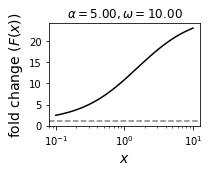

In [6]:
#Activation or repression as a function of alpha and w

#Activation
alpha=5
w=10

pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
qs=[1,1,1,1]
title=r"$\alpha=%2.2f,\omega=%2.2f$"%(alpha,w)
plot_parset(pars,qs,title=title,figname=os.path.join(figsfolder,"fig3Bup.pdf"))
#plot_parset(pars,qs,title=title,figname=None)

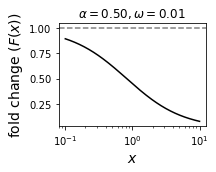

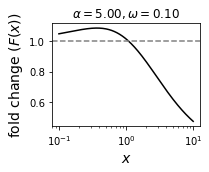

In [7]:
#Repression
alpha=0.5
w=1/100
pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
qs=[1,1,1,1]
title=r"$\alpha=%2.2f,\omega=%2.2f$"%(alpha,w)
plot_parset(pars,qs,title=title,figname=os.path.join(figsfolder,"fig3Bdown.pdf"))
#plot_parset(pars,qs,title=title,figname=None)
#Nonmonotonic
alpha=5
w=1/10
pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
title=r"$\alpha=%2.2f,\omega=%2.2f$"%(alpha,w)
#plot_parset(pars,qs,title=title)
plot_parset(pars,qs,title=title,figname=None)

In [8]:
alpha=12
w=0.1
xvals=np.logspace(-2,2,200)
bxvals=np.logspace(-2,2,200)
out=np.zeros((len(bxvals), len(xvals)))
qs=[1,1,1,1]
for b, bx in enumerate(bxvals):
    pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
    
    xval=0
    parset=getparset(pars)
    parset=np.concatenate((parset,qs))
    instance.fill_num_den(parset,othervars)
    expr0=instance.interfaceGRF(xval)
    #acc0=np.sum(Ps[4:])

    for x_,xval in enumerate(xvals):
        expr=instance.interfaceGRF(xval)
        out[b,x_]=expr/expr0
        

0.05
1
50


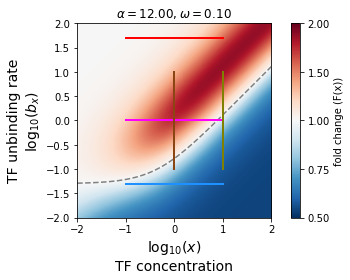

In [9]:
bxlist=[0.05,1,50]
colors_bx=["red","magenta","dodgerblue"][::-1]
fig,axplt=plt.subplots(1,1,figsize=(6,4)) 
#ar=np.ma.masked_array(out,mask=out<1)
min_val_rounded=np.round(out.min(),1) #round minimum value to 1 decimal
max_val_rounded=np.round(out.max(),0) #round max value to 0 decimals
norm=colors.TwoSlopeNorm(vmin=min_val_rounded, vcenter=1., vmax=max_val_rounded)
extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(bxvals[0]),np.log10(bxvals[-1])]
im=axplt.imshow(out,origin="lower",norm=norm,cmap=plt.cm.RdBu_r,extent=extent)
axplt.contour(out,extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
for b_,bx in enumerate(bxlist):
    print(bx)
    axplt.plot([-1.,1.],[np.log10(bx),np.log10(bx)],linestyle="-",color=colors_bx[b_],linewidth=2.)
axplt.plot([0,0],[-1,1],linestyle="-",color="saddlebrown",linewidth=2.)
axplt.plot([1,1],[-1,1],linestyle="-",color="olive",linewidth=2.)
    #ax.axhline(y=np.log10(bG),)
#ax.set_xscale('log')
axplt.set_ylabel("TF unbinding rate\n"+r"log$_{10}$($b_x$)",size=14)
axplt.set_xlabel(r"log$_{10}$($x$)"+"\nTF concentration",size=14)
title=r"$\alpha=%2.2f,\omega=%2.2f$"%(alpha,w)
axplt.set_title(title)
below_one=np.linspace(min_val_rounded,1,3)
above_one=np.linspace(1,max_val_rounded,3)
bounds=np.concatenate((below_one,above_one[1:]))
plt.colorbar(im,label="fold change (F(x))",ax=axplt,ticks=bounds)
#ax.axhline(y=1,linestyle="--",color="gray")
#if title is not None:
#    ax.set_title(title)
#plt.savefig("cmaptest.pdf",bbox_inches="tight")
plt.tight_layout()
plt.savefig(os.path.join(figsfolder,"fig3C_cmap.pdf"),bbox_inches="tight")
plt.show()

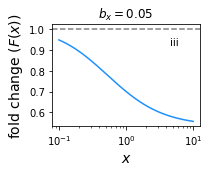

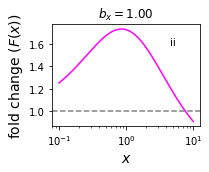

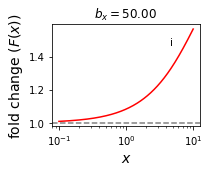

In [10]:
text_labels=["iii","ii","i"]
for b_,bx in enumerate(bxlist):
    pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
    #title=r"$\alpha=%2.2f,\omega=%2.2f,b_x=%2.2f$"%(alpha,w,bG)
    title=r"$b_x=%2.2f$"%(bx)
    plot_parset(pars,qs,title=title,color=colors_bx[b_],text=text_labels[b_],figname=os.path.join(figsfolder,"fig3C_panel%s.pdf"%text_labels[b_]))
    #plot_parset(pars,qs,title=title,color=colors_bx[b_],text=text_labels[b_],figname=None)


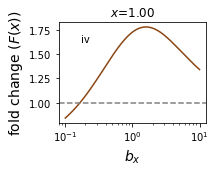

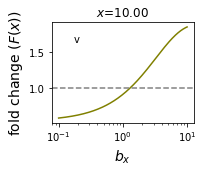

In [11]:
#now as a function of bx

pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
text_labels=["iv","v"]
colors_lines=["saddlebrown","olive"]
for x_,x in enumerate([1,10]):
    title=r"$x$=$%2.2f$"%(x)
    plot_parset_bx(pars,qs,x,title=title,text=text_labels[x_],color=colors_lines[x_],figname=os.path.join(figsfolder,"fig3C_panel%s.pdf"%text_labels[x_]))
    #plot_parset_bx(pars,qs,x,title=title,text=text_labels[x_],color=colors_lines[x_],figname=None)


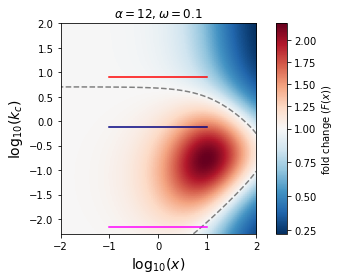

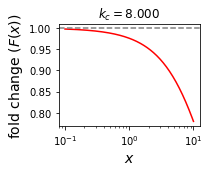

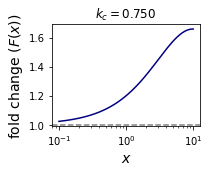

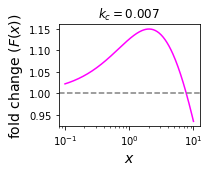

In [12]:
#Fig S2A
#as a function of kclose
bx=14 #increasing bx moves the maximum in the middle region towards the right
xvals=np.logspace(-2,2,100)
kclosevals=np.logspace(np.log10(0.005),np.log10(100),100)

out=np.zeros((len(kclosevals), len(xvals)))

for k, kclose0 in enumerate(kclosevals):
    pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])

    xval=0
    parset=getparset(pars)
    parset=np.concatenate((parset,qs))
    instance.fill_num_den(parset,othervars)
    expr0=instance.interfaceGRF(xval)

    for x_,xval in enumerate(xvals):
        expr=instance.interfaceGRF(xval)
        out[k,x_]=expr/expr0

kcloselist=[8,0.75,0.007]
fig,axplt=plt.subplots(1,1,figsize=(6,4)) 
#ar=np.ma.masked_array(out,mask=out<1)
norm=colors.TwoSlopeNorm(vmin=out.min(), vcenter=1., vmax=out.max())
extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(kclosevals[0]),np.log10(kclosevals[-1])]
im=axplt.imshow(out,origin="lower",norm=norm,cmap=plt.cm.RdBu_r,extent=extent)
axplt.contour(out,extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
colors_kc=["red","navy","magenta"]
for k_,kc in enumerate(kcloselist):
#    print(kc)
    axplt.plot([-1.,1.],[np.log10(kc),np.log10(kc)],linestyle="-",color=colors_kc[k_])

    #ax.axhline(y=np.log10(bG),)
#ax.set_xscale('log')
axplt.set_ylabel(r"log$_{10}$($k_c$)",size=14)
axplt.set_xlabel(r"log$_{10}$($x$)",size=14)
axplt.set_title(r"$\alpha=%g,\omega=%g$"%(alpha,w))

plt.colorbar(im,label="fold change ($F(x)$)",ax=axplt)
#ax.axhline(y=1,linestyle="--",color="gray")
#if title is not None:
#    ax.set_title(title)
plt.savefig(os.path.join(figsfolder,"figS2Acmap.pdf"))
plt.tight_layout()
plt.show()
for k_,k_close_ in enumerate(kcloselist):
    pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,k_close_,alpha,beta,gamma,w,kbx])
    title=r"$k_c=%2.3f$"%(k_close_)
    plot_parset(pars,qs,title=title,color=colors_kc[k_],figname=os.path.join(figsfolder,"figS2A_%d.pdf"%k_))
    #plot_parset(pars,qs,title=title,color=colors_kc[k_],figname=None)

In [13]:
ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx

(1, 14, 0.1, 100, 0.01, 100.0, 12, 0.02, 1, 0.1, 1)

# Old stuff, not included

Would there be a regime where the effect of the TF is repressive for alpha and w, q_3<q_4<q_7<q_8, and the response is nonmonotonic?

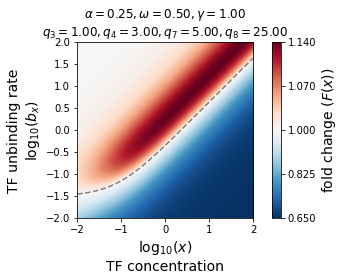

In [59]:
#old Fig S2B
kbx=1 #we consider x doesn't change binding in closed/open
ax=1
bx=10
aP_0_0=0.1
bP_P_0=100
kopen0=0.01
kclose0=0.5
beta=0.001
gamma=1

#Repressive alpha and w, increasing qs
alpha=0.25
w=0.5
qs=[1,3,5,25]


xvals=np.logspace(-2,2,200)
bxvals=np.logspace(-2,2,200)
out=np.zeros((len(bxvals), len(xvals)))
for b, bx in enumerate(bxvals):
    pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
    
    xval=0
    parset=getparset(pars)
    parset=np.concatenate((parset,qs))
    instance.fill_num_den(parset,othervars)
    expr0=instance.interfaceGRF(xval)
    #acc0=np.sum(Ps[4:])

    for x_,xval in enumerate(xvals):
        expr=instance.interfaceGRF(xval)
        out[b,x_]=expr/expr0
bxlist=[0.05,1,50]
colors_bx=["red","magenta","navy"]
fig,axplt=plt.subplots(1,1,figsize=(6,4)) 
#ar=np.ma.masked_array(out,mask=out<1)

min_val_rounded=np.round(out.min(),2) #round minimum value to 2 decimal
max_val_rounded=np.round(out.max(),2) #round max value to 2 decimal1
norm=colors.TwoSlopeNorm(vmin=min_val_rounded, vcenter=1., vmax=max_val_rounded)

extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(bxvals[0]),np.log10(bxvals[-1])]
im=axplt.imshow(out,origin="lower",norm=norm,cmap=plt.cm.RdBu_r,extent=extent)
axplt.contour(out,extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
#for b_,bx in enumerate(bxlist):
#    print(bx)
#    axplt.plot([-1.,1.],[np.log10(bx),np.log10(bx)],linestyle="-",color=colors_bx[b_])
#axplt.plot([0,0],[-1,1],linestyle="-",color="purple")
#axplt.plot([1,1],[-1,1],linestyle="-",color="dodgerblue")
    #ax.axhline(y=np.log10(bG),)
#ax.set_xscale('log')
axplt.set_ylabel("TF unbinding rate\n"+r"log$_{10}$($b_x$)",size=14)
axplt.set_xlabel(r"log$_{10}$($x$)"+"\nTF concentration",size=14)
title=r"$\alpha=%2.2f,\omega=%2.2f, \gamma=%2.2f$"%(alpha,w,gamma)+"\n"+"$q_3=%2.2f, q_4=%2.2f, q_7=%2.2f, q_8=%2.2f$"%(qs[0],qs[1],qs[2],qs[3])
axplt.set_title(title)
below_one=np.linspace(min_val_rounded,1,3)
above_one=np.linspace(1,max_val_rounded,3)
bounds=np.concatenate((below_one,above_one[1:]))
cbax=plt.colorbar(im,ax=axplt,ticks=bounds)
cbax.set_label(label="fold change ($F(x)$)",size=14)
#ax.axhline(y=1,linestyle="--",color="gray")
#if title is not None:
#    ax.set_title(title)
#plt.savefig("cmaptest.pdf",bbox_inches="tight")
plt.tight_layout()
#plt.savefig(os.path.join(figsfolder,"figS2B.pdf"),bbox_inches="tight")
plt.show()

In fact, when we assume that q_3<q_4<q_7<q_8, but alpha<1 and w<1, this is also representing some intrinsic duality for the TF. Since we are saying expression is higher when the TF is bound than when it is not, but on the other hand it reduces polymerase binding. 

In order for the expression rates to align with a repressive effect of the TF, we must assume that q4<q3<q8<q7.

In [12]:
#gamma=1, w<1, alpha<1, q_i4<q3<q8<q7 should never be increasing 

kbx=1

np.random.seed(2)
xvals=np.logspace(-3,3,1000)
niter=10000

for i in range(niter):
    
    ax,bx,kopen0,kclose0=10**np.random.uniform(-3,3,size=4)
    f1=10**np.random.uniform(0,3)
    
    d1,alpha,beta,w=10**np.random.uniform(-3,0,size=4)
    bP_P_0=f1*bx
    aP_0_0=d1*ax
    gamma=1
    q4=10**np.random.uniform(-3,3)
    epsilon3,epsilon7,epsilon8=10**np.random.uniform(0,3,size=3)
    q3=epsilon3*q4
    q8=epsilon3*epsilon8*q4
    q7=epsilon3*epsilon7*epsilon8*q4
    pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])

    xval=0
    parset=getparset(pars)
    qs=[q3,q4,q7,q8]
    parset=np.concatenate((parset,qs))
    instance.fill_num_den(parset,othervars)
    expr0=instance.interfaceGRF(xval)
    #acc0=np.sum(Ps[4:])

    values=np.zeros_like(xvals)

    for x_,xval in enumerate(xvals):
        expr=instance.interfaceGRF(xval)
        values[x_]=expr/expr0
        
    if np.any(np.diff(values)>0):
        
        print(q4,q3,q8,q7)
        print(",".join(list(map(str,pars))))
        sys.stdout.flush()
        plot_parset(pars,qs,widerange=True)
        plt.show()
print(i)

9999


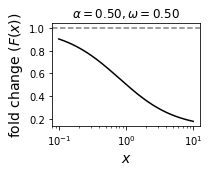

In [15]:
kbx=1 #we consider x doesn't change binding in closed/open
ax=1
bx=1
aP_0_0=0.1
bP_P_0=100
kopen0=0.01
kclose0=0.5
beta=0.02
gamma=1

#Repression
alpha=0.5
w=1/2
pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
q4=1
q3=5
q8=5
q7=10
qs=[q3,q4,q7,q8]
title=r"$\alpha=%2.2f,\omega=%2.2f$"%(alpha,w)
plot_parset(pars,qs,title=title,figname=None)

Is there a negative or nonmonotonic response if $\alpha>1$, $\omega>1$, q3=q4=q7=q8=1, $\gamma< 1$?

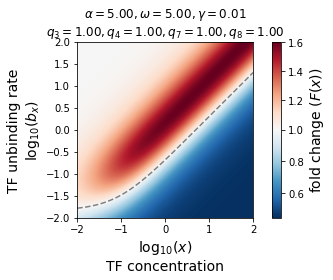

In [19]:
#old Fig S2C
kbx=1 #we consider x doesn't change binding in closed/open
ax=1
bx=10
aP_0_0=0.1
bP_P_0=100
kopen0=0.01
kclose0=0.5
beta=0.001
gamma=0.01

#Activating alpha and omega, equal qs
alpha=5
w=5
qs=[1,1,1,1]


xvals=np.logspace(-2,2,200)
bxvals=np.logspace(-2,2,200)
out=np.zeros((len(bxvals), len(xvals)))
for b, bx in enumerate(bxvals):
    pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
    
    xval=0
    parset=getparset(pars)
    parset=np.concatenate((parset,qs))
    instance.fill_num_den(parset,othervars)
    expr0=instance.interfaceGRF(xval)
   

    for x_,xval in enumerate(xvals):
        expr=instance.interfaceGRF(xval)
        out[b,x_]=expr/expr0
bxlist=[0.05,1,50]
colors_bx=["red","magenta","navy"]
fig,axplt=plt.subplots(1,1,figsize=(6,4)) 
#ar=np.ma.masked_array(out,mask=out<1)
norm=colors.TwoSlopeNorm(vmin=out.min(), vcenter=1., vmax=out.max())
extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(bxvals[0]),np.log10(bxvals[-1])]
im=axplt.imshow(out,origin="lower",norm=norm,cmap=plt.cm.RdBu_r,extent=extent)
axplt.contour(out,extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
#for b_,bx in enumerate(bxlist):
#    print(bx)
#    axplt.plot([-1.,1.],[np.log10(bx),np.log10(bx)],linestyle="-",color=colors_bx[b_])
#axplt.plot([0,0],[-1,1],linestyle="-",color="purple")
#axplt.plot([1,1],[-1,1],linestyle="-",color="dodgerblue")
    #ax.axhline(y=np.log10(bG),)
#ax.set_xscale('log')
axplt.set_ylabel("TF unbinding rate\n"+r"log$_{10}$($b_x$)",size=14)
axplt.set_xlabel(r"log$_{10}$($x$)"+"\nTF concentration",size=14)
title=r"$\alpha=%2.2f,\omega=%2.2f, \gamma=%g$"%(alpha,w,gamma)+"\n"+"$q_3=%2.2f, q_4=%2.2f, q_7=%2.2f, q_8=%2.2f$"%(qs[0],qs[1],qs[2],qs[3])
axplt.set_title(title)
cbax=plt.colorbar(im,ax=axplt)
cbax.set_label(label="fold change ($F(x)$)",size=14)
#ax.axhline(y=1,linestyle="--",color="gray")
#if title is not None:
#    ax.set_title(title)
#plt.savefig("cmaptest.pdf",bbox_inches="tight")
plt.tight_layout()
#plt.savefig(os.path.join(figsfolder,"figS2C.pdf"),bbox_inches="tight")
plt.show()

Is there a negative or nonmonotonic response if $\alpha<1$, $\omega<1$, q3=q4=q7=q8=1, $\gamma< 1$?

233.89644405140857,29.512746774268777,25.325796416331237,1925.6986042987578,13.825811563305333,0.4082373173259537,0.0014822219466245192,0.649980616898211,0.001603186743665301,0.29900133535448364,1.0


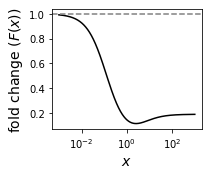

49.0483211568782,0.0012203070089361848,0.06556734553206797,0.0030727108261086014,7.618094192208145,0.002829609557325616,0.001289564764909278,0.3234486571433753,0.020562377789659702,0.027088881672575102,1.0


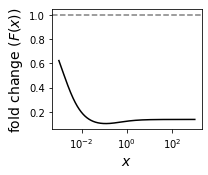

0.5955532549165699,0.3147181388806512,0.025510457279855986,0.4843045876852145,0.6745275409091152,0.007728704499525565,0.005586632378270257,0.5613103695915956,0.02760413403582862,0.3054356139129228,1.0


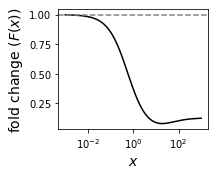

325.6078640501328,5.756297129951999,3.937667978888411,375.65154512077004,1.1968262499499647,0.14261603740731246,0.02045508730446078,0.5488689805321139,0.005787399005355077,0.38154666686272753,1.0


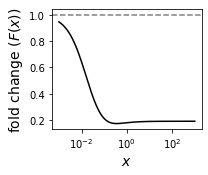

5.8695331989212205,13.649703687171824,0.01687844785453134,420.6426982313918,3.240525612367388,1.0727538721637977,0.005590181731984912,0.8772262227609805,0.009956958694236245,0.6737325672142555,1.0


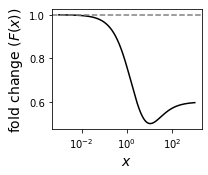

3.828177523425556,32.77338262477977,0.1728178587378145,57.04662303958898,0.5489002239619275,0.008680598771197898,0.015102024537311123,0.5578504615345603,0.0017630497622421685,0.5427979052269959,1.0


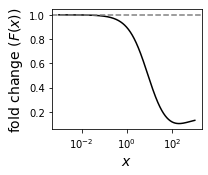

0.0029553293529860068,0.018177609554983792,0.002928166785578525,0.09247967133776121,0.1816401413659478,0.02949705611025247,0.0010593588471751974,0.43853268987030203,0.0010543334169935566,0.8553037443176714,1.0


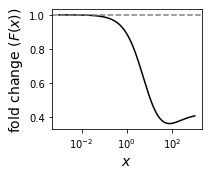

12.792667739971167,0.4442523661919952,0.22896771841630326,55.49487278579547,10.194788478862922,0.12618185361635378,0.0021266974374163465,0.6090658491746243,0.011861917682341926,0.3069387872393817,1.0


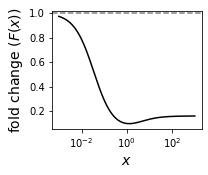

31.995753873712356,0.010572504873675921,4.569793779354141,2.1277322420565796,6.729652094998883,0.0074901073221922765,0.0017220838073857944,0.0633361957336068,0.008131130522617625,0.9961342128117825,1.0


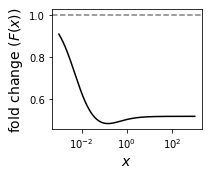

75.62027253521902,306.0536493842545,38.423171180596995,1279.2806443178922,392.74286419292855,4.727130407518873,0.005462288195218868,0.22486156092066362,0.0011189981195534186,0.654183540077375,1.0


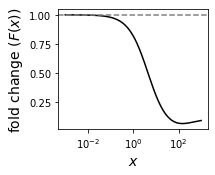

0.36121708522197227,0.09419049623446982,0.059980422051255256,2.519935883136178,0.39963346199097877,0.00633550987519064,0.003221342336740635,0.09948773399938328,0.005182927965414011,0.6736150218992791,1.0


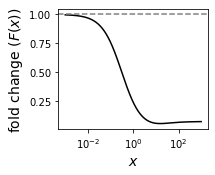

74.45115518110336,0.03619586879434477,11.479415777798046,1.2122530684335213,0.04214623830398678,0.002120731262599095,0.005365157572324564,0.489547659527734,0.20550656720222196,0.15304635970199554,1.0


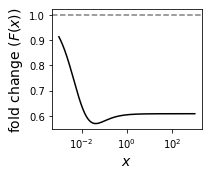

143.6394060744782,0.0023582192667946354,3.343009748823884,0.07871583162689173,0.27445515068666665,0.009334463750757103,0.00467344343897496,0.14954617624914718,0.011553448174829313,0.09547033643624434,1.0


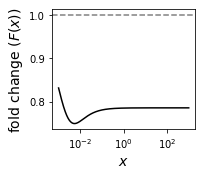

460.23353015319583,0.8639445227864015,2.0862668203204984,4.514096917471185,0.16566946668687,0.0015321597488469956,0.004260439149511369,0.47178944938072537,0.3619382262685005,0.7386330842186538,1.0


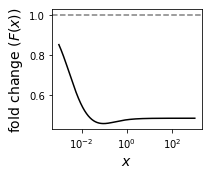

0.24102736384669862,0.11252903995903088,0.05858381361146243,70.23513411438016,0.009968381981664928,0.0013208715445976748,0.0073819759838386866,0.7873347247206434,0.004045415908640896,0.32458366664932753,1.0


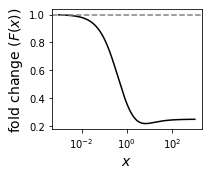

642.9702439499687,0.021883113203050756,21.926270478594684,0.08815628963727287,0.03322892293273032,0.001157578058098544,0.006168648662450485,0.4910837524618267,0.0019234273977842317,0.16827037352352836,1.0


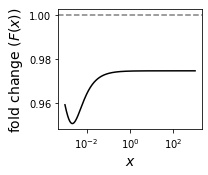

18.838784664623127,8.944517615599096,1.6791104956534064,73.74785258030661,4.95104533312791,0.1197160724739776,0.01876316363847743,0.32148017499150267,0.06619905815522721,0.7594554671372445,1.0


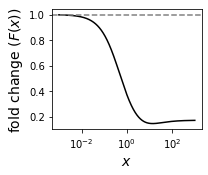

0.05349670457074129,0.01944789415903207,0.00419051804486763,17.068268862189093,1.7340374494890087,0.03549641720676981,0.0010179150977221772,0.24580149555681605,0.0011476139849288449,0.8673000166289037,1.0


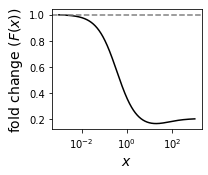

1.453773408388839,0.49811229066982216,0.002826018961744429,13.428129728744699,45.97804392239084,0.3097082627524517,0.003969813866036742,0.8329197188141427,0.005976883390854855,0.3394670248999305,1.0


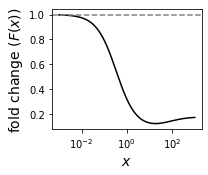

322.3513745692845,0.6447462861427528,82.75457377900211,93.75135374223059,26.271547903088546,0.3361605803872709,0.006193756736006889,0.07808060481634341,0.00305701093131837,0.9903852294672538,1.0


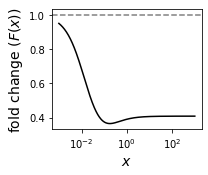

0.7025648954649162,0.04248726080078007,0.0015941828872613926,0.06295810498949601,1.6172455105709027,0.0041444051258048556,0.0019163612579046272,0.8841527587443347,0.01890771670202432,0.7941856863878679,1.0


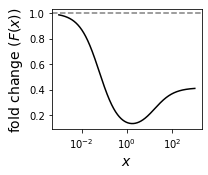

59.368673501106194,1.9097598609784228,0.07610068597161156,879.7780046140177,27.567607751228962,2.1234280768295157,0.014938932957636175,0.7693788613292197,0.04581458786745015,0.4606087839060286,1.0


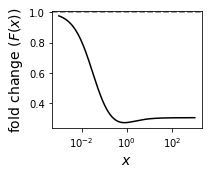

754.7603090498229,732.7482468688852,379.23490216002756,135501.29767134314,0.8789201206186941,0.0035178937949607884,0.0014857639310475624,0.5289876597863433,0.002342958894207719,0.5065292422354519,1.0


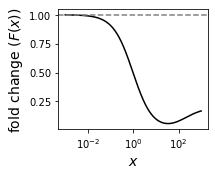

0.013677266321096355,0.11534847188469959,0.0006185200051139132,7.4204893629634725,0.40610872438414325,0.0032012540082581253,0.0019754797646962274,0.25318394567411223,0.030033314675945527,0.8196546581987336,1.0


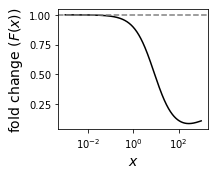

0.0034910383567463093,0.025281845761504478,0.001317410392487406,0.11564912668057958,4.309431838543328,0.04205702570870048,0.0011625599667508648,0.4457013217559019,0.02617896052042135,0.8686762720498348,1.0


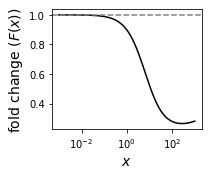

3.591469909830479,0.05255639380890896,1.332372199151963,0.1469122090695658,34.485266230014844,0.02457100831733157,0.0015471499235870704,0.6711847834482513,0.002523748967535929,0.5494619978908125,1.0


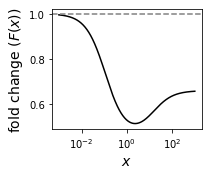

935.7085314618325,612.2077536570716,65.93884176329651,19256.610422173693,3.306675251210622,0.8800451970347026,0.028552208635779442,0.6893898444810145,0.011681665144958352,0.8781070541597905,1.0


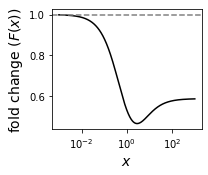

61.803893101697845,460.56235319434785,0.47914534394700814,50211.19620148764,0.00681290519609703,0.0023966380149031932,0.003572904808191202,0.6772681570487803,0.003791781149319606,0.9861077889282139,1.0


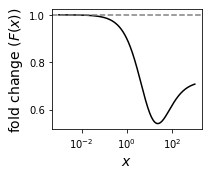

38.739508872586526,1.2756763529110258,0.3692350699884919,1.4035834299255585,1.7441582392854116,0.07314227933284438,0.004601162001454216,0.29822110260983076,0.04337099757810763,0.4154187635799028,1.0


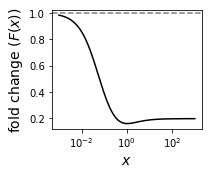

238.85915567472162,0.0011576452741576262,0.3858483756729108,0.03274591025323666,0.08596832534561794,0.0010791692185003695,0.005146644559071845,0.6272049351804625,0.1226942163157622,0.31197095471947106,1.0


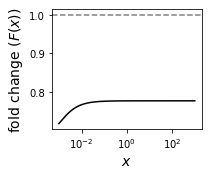

7.1554364189028545,0.012855789358606326,6.087844456010317,0.015466235994126939,0.0940862100683651,0.0028876395305137454,0.008436374692751332,0.7041852015789999,0.005555706833295042,0.00146136671228087,1.0


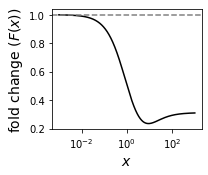

436.6574958576665,0.0038444180604307156,226.060193838483,0.014997213009956177,49.910279129102825,0.06974259152457433,0.0031975217929174344,0.09325144881847107,0.00455497059681171,0.003081523639692623,1.0


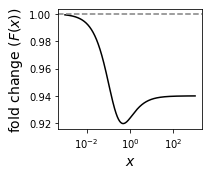

0.43239511036947703,18.398613747379958,0.0007604180684651091,2777.7308401111245,0.9152732260248534,0.02067780352146325,0.008258039584242063,0.8590788918955814,0.0036312237822691542,0.8019361068706551,1.0


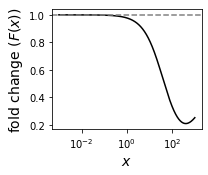

729.396240058003,0.012698490446837277,30.738475543127787,0.2463573533993887,1.0180454526985037,0.004657827866303106,0.002126309327184848,0.40008312028955306,0.04438296228622691,0.007085402698113543,1.0


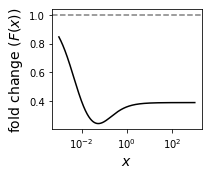

0.3543775286695349,0.012442963436444465,0.03553889442365171,0.02734573616284517,0.6508587761475898,0.013281376296224586,0.0020585870997397323,0.5998555456937167,0.022092806449047268,0.15017715287969519,1.0


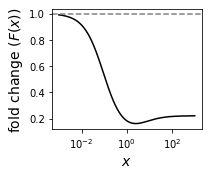

14.476941623189633,60.30889744189267,0.04050547708473381,1547.1015525714124,1.6472919709986054,0.0024546486685320646,0.00399667225712299,0.3587756942607244,0.0015558218839004877,0.8316809081862544,1.0


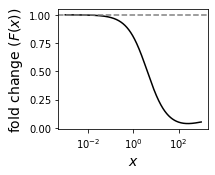

0.5308367534929236,0.2360738663518565,0.012965497239761982,0.3621503464847885,0.1275064224804567,0.032844704759325015,0.008935240842682388,0.20240582047102026,0.001892189655898197,0.888227010160181,1.0


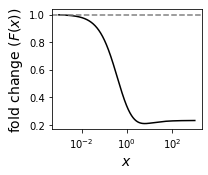

427.2868099913367,0.10855602574050223,22.474098573465177,87.24704372841873,7.395906612731896,0.12965618880736454,0.008107088721257724,0.4291686877909427,0.005569959862690345,0.5326699549688876,1.0


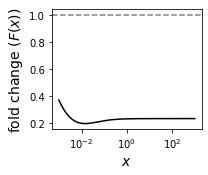

357.05529390418315,0.9531601196096686,5.431246154048157,106.38730898884687,0.07018102548232664,0.0072386817139766125,0.043031561193516754,0.2718964169631444,0.00446620160450602,0.8488147545662693,1.0


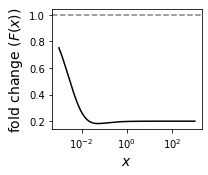

9999


In [20]:
kbx=1

np.random.seed(2)
xvals=np.logspace(-3,3,1000)
niter=10**4

for i in range(niter):
    
    ax,bx,kopen0,kclose0=10**np.random.uniform(-3,3,size=4)
    f1=10**np.random.uniform(0,3)
    d1,alpha,beta,w,gamma=10**np.random.uniform(-3,0,size=5)
    aP_0_0=d1*ax #assume pol binding rate is lower than x, so less affinity
    bP_P_0=f1*bx #assume pol unbinding rate is higher than x, so less affinity
    pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])

    xval=0
    parset=getparset(pars)
    qs=[1,1,1,1]
    parset=np.concatenate((parset,qs))
    instance.fill_num_den(parset,othervars)
    expr0=instance.interfaceGRF(xval)
    #acc0=np.sum(Ps[4:])

    values=np.zeros_like(xvals)

    for x_,xval in enumerate(xvals):
        expr=instance.interfaceGRF(xval)
        values[x_]=expr/expr0
        
    if np.any(np.diff(values)>0.0001) and np.any(values>0.25):  #np.diff(values)>0.0001 selects for increases in response to x
        
        print(",".join(list(map(str,pars))))
        sys.stdout.flush()
        plot_parset(pars,qs,widerange=True)
        plt.show()
print(i)

Note however that it never seems to go above 1. So non-monotonic in the repressive regime.

<ipython-input-58-d4088cd18d8d>:42: UserWarning: No contour levels were found within the data range.
  axplt.contour(out,extent=extent,levels=[1],linestyles=["--"],colors=["gray"])


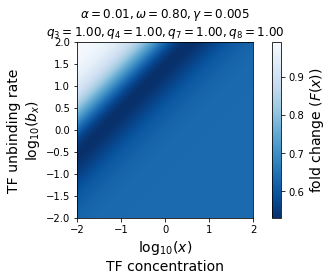

In [58]:
#from one of above plots- Fig S2D-> #Repressive alpha and w, same q, gamma<1

kbx=1 #we consider x doesn't change binding in closed/open
ax=100
bx=460
aP_0_0=0.5
bP_P_0=4000
kopen0=0.007
kclose0=0.003
beta=0.75



alpha=0.01
w=0.8
gamma=0.005
qs=[1,1,1,1]


xvals=np.logspace(-2,2,200)
bxvals=np.logspace(-2,2,200)
out=np.zeros((len(bxvals), len(xvals)))

for b, bx in enumerate(bxvals):
    pars=np.array([ax,bx,aP_0_0,bP_P_0,kopen0,kclose0,alpha,beta,gamma,w,kbx])
    
    xval=0
    parset=getparset(pars)
    parset=np.concatenate((parset,qs))
    instance.fill_num_den(parset,othervars)
    expr0=instance.interfaceGRF(xval)
    #acc0=np.sum(Ps[4:])

    for x_,xval in enumerate(xvals):
        expr=instance.interfaceGRF(xval)
        out[b,x_]=expr/expr0

fig,axplt=plt.subplots(1,1,figsize=(6,4)) 
norm=colors.TwoSlopeNorm(vmin=out.min(), vcenter=out.mean(),vmax=out.max())
extent=[np.log10(xvals[0]),np.log10(xvals[-1]),np.log10(bxvals[0]),np.log10(bxvals[-1])]
im=axplt.imshow(out,origin="lower",cmap=plt.cm.Blues_r,extent=extent)
axplt.contour(out,extent=extent,levels=[1],linestyles=["--"],colors=["gray"])
axplt.set_ylabel("TF unbinding rate\n"+r"log$_{10}$($b_x$)",size=14)
axplt.set_xlabel(r"log$_{10}$($x$)"+"\nTF concentration",size=14)
title=r"$\alpha=%2.2f,\omega=%2.2f, \gamma=%2.3f$"%(alpha,w,gamma)+"\n"+"$q_3=%2.2f, q_4=%2.2f, q_7=%2.2f, q_8=%2.2f$"%(qs[0],qs[1],qs[2],qs[3])
axplt.set_title(title)


cbax=plt.colorbar(im,ax=axplt)
cbax.set_label(label="fold change ($F(x)$)",size=14)
plt.tight_layout()
#plt.savefig(os.path.join(figsfolder,"figS2D.pdf"),bbox_inches="tight")
plt.show()